This document was partly cobbled together by [Mark McClure](http://www.marksmath.org/) for his Math/CS 441 class in numerical computing at [UNCA](http://www.unca.edu/). It is largely based on a similar document by [Rick Muller](http://www.cs.sandia.gov/~rmuller/) called [A crash course in Python for Scientists](https://gist.github.com/rpmuller/5920182) - particularly, the extensive section entitled Python Overview.

Numerical computation in the 21st century is largely performed on a computer. Thus, a full understanding of numerical methods requires a numerical environment to explore implementation. For this purpose, we will use Python and the extensive family of numerical libraries known as SciPy. Python is the programming language of choice for many scientists to a large degree because it offers a great deal of power to analyze and model scientific data with relatively little overhead in terms of learning, installation or development time. The easiest way to get a full SciPy distribution up and running is to install [Anaconda](https://www.continuum.io/downloads) by [Continuum Analytics](https://www.continuum.io/).

## Glossary

 * [Python](http://www.python.org): A popular, general purpose programming language with a number of advantages for an introductory class in numerical computing, including
   - Relatively asy to get started with
   - Runs interactively in a notebook
   - Interpreted (no compilation step)
   - A large number of libraries for scientific exploration and computing, like ...
 * [SciPy](http://www.scipy.org): One of the oldest and most important scientific libraries. Scipy can refer to the single library by that name or to the collection of core packages including:
   - [Numpy](http://www.numpy.org/): The low level numeric library
   - [SciPy library](http://scipy.org/scipylib/): Higher level functions built on top of numpy
   - [Matplotlib](http://matplotlib.org/): A graphics library for plotting results
   - [SymPy](http://www.sympy.org): A rudimentary symbolic library
   - [IPython](http://ipython.org/): Extensions for Python that make it even more interactive. This has recently evolved into ...
 * [Jupyter](http://jupyter.org/): A language agnostic extention of IPython that makes it easy to interact with a large collection of programming languages. Of key importance for us is the Jupyter notebook.
 * [Anaconda](https://www.continuum.io/why-anaconda): A Python distribution that includes all the tools we'll need.

For a quick jump into numerical computing, you can try out the [online Jupyter notebook](http://try.jupyter.org/). If you're going to continue in your studies of numerical computing, you should undoubtedly install your own version of Anaconda. Either way, the rest of this document assumes that you've got some version of Python and it's numerical tools running.

## Python Overview

This is a quick introduction to Python. There are lots of other places to learn the language more thoroughly and there is a collection of useful links, including ones to other learning resources, at the end of this notebook. 

### Using Python as a Calculator

Many of the things I used to use a calculator for, I now use Python for:

In [67]:
2+2

4

In [68]:
(50-5*6)/4

5.0

(If you're typing this into an IPython notebook, or otherwise using notebook file, you hit shift-Enter to evaluate a cell.)

You can define variables using the equals (=) sign:

In [69]:
width = 20
length = 30
area = length*width
area

600

If you try to access a variable that you haven't yet defined, you get an error:

In [70]:
volume

6000

and you need to define it:

In [71]:
depth = 10
volume = area*depth
volume

6000

You can name a variable *almost* anything you want. It needs to start with an alphabetical character or "\_", can contain alphanumeric charcters plus underscores ("\_"). Certain words, however, are reserved for the language:

    and, as, assert, break, class, continue, def, del, elif, else, except, 
    exec, finally, for, from, global, if, import, in, is, lambda, not, or,
    pass, print, raise, return, try, while, with, yield

Trying to define a variable using one of these will result in a syntax error:

In [72]:
return = 0

SyntaxError: invalid syntax (<ipython-input-72-c7a05f6eb55e>, line 1)

Now, let's take a look at an `import` statement. Python has a huge number of libraries included with the distribution. To keep things simple, most of these variables and functions are not accessible from a normal Python interactive session. Instead, you have to import the name. For example, there is a `math` module containing many useful functions. To access, say, the square root function, you can either first

In [73]:
from math import sqrt

and then

In [74]:
sqrt(81)

9.0

or you can simply import the math library itself

In [75]:
import math
math.sqrt(81)

9.0

Note, however, that a numerical analyst will often prefer to use the math functionality available in `numpy`.

In [76]:
# Be careful when doing exponents! the operator for exponentiation is **, not the intuitive ^
# also remember to comment your code using the pound sign!

2^2 # The up-caret does what's called "bitwise xor" which will seldom be useful to you

0

In [77]:
2**2 # The double-star allows you to raise numbers to powers

4

In [78]:
3**4

81

In [79]:
81**(1/2)

9.0

### Be aware of division
In Python 3, which most people are using by now, division will automatically return a float, even if both the variables you're dividing are integers. This is fine for math, but not great if you want to index an array. (In python 2, this would have returned an integer!)

In [80]:
4/2

2.0

In [81]:
arr = ['a','b','c']
arr[4/2]

TypeError: list indices must be integers or slices, not float

If you want to divide integers and get an integer back, use a double slash `//`. Note this _always_ rounds down.

In [82]:
arr[4//2]

'c'

In [83]:
399//400

0

### Data types

#### Numbers

Python is dynamically typed, but it is still typed. In particular, there are three disctinct kinds of numbers `int`, `float`, and `complex`.

An `int` can have unlimited precision.

In [84]:
2**(1001)-1

21430172143725346418968500981200036211228096234110672148875007767407021022498722449863967576313917162551893458351062936503742905713846280871969155149397149607869135549648461970842149210124742283755908364306092949967163882534797535118331087892154125829142392955373084335320859663305248773674411336138751

A `complex` has a real and imaginary part and is easily entered in the form `a+bj`.

In [85]:
(2+3j)**3

(-46+9j)

We are mostly interested in `floats` which can be used to model real numbers and are typically implemented internally as C `double`s.  Note that there is a distinction between a `float` and an `int`.

In [86]:
1 is 1.0

False

#### Strings
Strings are lists of printable characters, and can be defined using either single quotes

In [87]:
'Hello, World!'

'Hello, World!'

or double quotes

In [88]:
"Hello, World!"

'Hello, World!'

But not both at the same time, unless you want one of the symbols to be part of the string.

In [89]:
"He's a Rebel"

"He's a Rebel"

In [90]:
'She asked, "How are you today?"'

'She asked, "How are you today?"'

Just like the other two data objects we're familiar with (ints and floats), you can assign a string to a variable

In [91]:
greeting = "Hello, World!"

The **print** statement is often used for printing character strings:

In [92]:
print(greeting)

Hello, World!


But it can also print data types other than strings:

In [93]:
print("The area is ",area)

The area is  600


In the above snipped, the number 600 (stored in the variable "area") is converted into a string before being printed out.

You can use the + operator to concatenate strings together:

In [94]:
statement = "Hello," + "World!"
print(statement)

Hello,World!


Don't forget the space between the strings, if you want one there. 

In [95]:
statement = "Hello, " + "World!"
print(statement)

Hello, World!


You can use + to concatenate multiple strings in a single statement:

In [96]:
print("This " + "is " + "a " + "longer " + "statement.")

This is a longer statement.


If you have a lot of words to concatenate together, there are other, more efficient ways to do this. But this is fine for linking a few strings together.

#### Lists
Very often in a programming language, one wants to keep a group of similar items together. Python does this using a data type called **lists**.

In [97]:
days_of_the_week = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

You can access members of the list using the **index** of that item:

In [98]:
days_of_the_week[2]

'Tuesday'

Python lists, like C, but unlike Fortran, use 0 as the index of the first element of a list. Thus, in this example, the 0 element is "Sunday", 1 is "Monday", and so on. If you need to access the *n*th element from the end of the list, you can use a negative index. For example, the -1 element of a list is the last element:

In [99]:
days_of_the_week[-1]

'Saturday'

You can add additional items to the list using the .append() command:

In [100]:
languages = ["Fortran","C","C++"]
languages.append("Python")
print(languages)

['Fortran', 'C', 'C++', 'Python']


The **range()** command is a convenient way to make sequential lists of numbers:

In [101]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Note that range(n) starts at 0 and gives the sequential list of integers less than n. If you want to start at a different number, use range(start,stop)

In [102]:
list(range(2,8))

[2, 3, 4, 5, 6, 7]

The lists created above with range have a *step* of 1 between elements. You can also give a fixed step size via a third command:

In [103]:
evens = list(range(0,20,2))
evens

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [104]:
evens[3]

6

Lists do not have to hold the same data type. For example,

In [105]:
["Today",7,99.3,""]

['Today', 7, 99.3, '']

However, it's good (but not essential) to use lists for similar objects that are somehow logically connected. If you want to group different data types together into a composite data object, it's best to use **tuples**, which we will learn about below.

You can find out how long a list is using the **len()** command:

In [106]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [107]:
len(evens)

10

### Iteration, Indentation, and Blocks
One of the most useful things you can do with lists is to *iterate* through them, i.e. to go through each element one at a time. To do this in Python, we use the **for** statement:

In [108]:
for day in days_of_the_week:
    print(day)

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday


This code snippet goes through each element of the list called **days_of_the_week** and assigns it to the variable **day**. It then executes everything in the indented block (in this case only one line of code, the print statement) using those variable assignments. When the program has gone through every element of the list, it exists the block.

(Almost) every programming language defines blocks of code in some way. In Fortran, one uses END statements (ENDDO, ENDIF, etc.) to define code blocks. In C, C++, and Perl, one uses curly braces {} to define these blocks.

Python uses a colon (":"), followed by indentation level to define code blocks. Everything at a higher level of indentation is taken to be in the same block. In the above example the block was only a single line, but we could have had longer blocks as well:

In [109]:
for day in days_of_the_week:
    statement = "Today is " + day
    print(statement)

Today is Sunday
Today is Monday
Today is Tuesday
Today is Wednesday
Today is Thursday
Today is Friday
Today is Saturday


The `range` command is particularly useful with the **for** statement to execute loops of a specified length. Note that if we enter just a `range` we get, well, a `range`.

In [110]:
range(20)

range(0, 20)

This is why we wrapped the previous `range`'s in `list`. While this might seem odd, the point is that it is an iterable.

In [111]:
for i in range(20):
    print("The square of ",i," is ",i*i)

The square of  0  is  0
The square of  1  is  1
The square of  2  is  4
The square of  3  is  9
The square of  4  is  16
The square of  5  is  25
The square of  6  is  36
The square of  7  is  49
The square of  8  is  64
The square of  9  is  81
The square of  10  is  100
The square of  11  is  121
The square of  12  is  144
The square of  13  is  169
The square of  14  is  196
The square of  15  is  225
The square of  16  is  256
The square of  17  is  289
The square of  18  is  324
The square of  19  is  361


### Slicing
Lists and strings have something in common that you might not suspect: they can both be treated as sequences. You already know that you can iterate through the elements of a list. You can also iterate through the letters in a string:

In [112]:
for letter in "Sunday":
    print(letter)

S
u
n
d
a
y


This is only occasionally useful. Slightly more useful is the *slicing* operation, which you can also use on any sequence. We already know that we can use *indexing* to get the first element of a list:

In [113]:
days_of_the_week[0]

'Sunday'

If we want the list containing the first two elements of a list, we can do this via

In [114]:
days_of_the_week[0:2]

['Sunday', 'Monday']

or simply

In [115]:
days_of_the_week[:2]

['Sunday', 'Monday']

If we want the last items of the list, we can do this with negative slicing:

In [116]:
days_of_the_week[-2:]

['Friday', 'Saturday']

which is somewhat logically consistent with negative indices accessing the last elements of the list.

You can do:

In [117]:
workdays = days_of_the_week[1:6]
print(workdays)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


Since strings are sequences, you can also do this to them:

In [118]:
day = "Sunday"
abbreviation = day[:3]
print(abbreviation)

Sun


If we really want to get fancy, we can pass a third element into the slice, which specifies a step length (just like a third argument to the **range()** function specifies the step):

In [119]:
numbers = range(0,40)
evens = numbers[2::2]
list(evens)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

Note that in this example I was even able to omit the second argument, so that the slice started at 2, went to the end of the list, and took every second element, to generate the list of even numbers less that 40.

You can also go backwards by making the third argument negative.

In [120]:
workdays[::-1]

['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

### Booleans and Truth Testing
We have now learned a few data types. We have integers and floating point numbers, strings, and lists to contain them. We have also learned about lists, a container that can hold any data type. We have learned to print things out, and to iterate over items in lists. We will now learn about **boolean** variables that can be either True or False.

We invariably need some concept of *conditions* in programming to control branching behavior, to allow a program to react differently to different situations. If it's Monday, I'll go to work, but if it's Sunday, I'll sleep in. To do this in Python, we use a combination of **boolean** variables, which evaluate to either True or False, and **if** statements, that control branching based on boolean values.

For example:

In [121]:
if day == "Sunday":
    print("Sleep in")
else:
    print("Go to work")

Sleep in


(Quick quiz: why did the snippet print "Go to work" here? What is the variable "day" set to?)

Let's take the snippet apart to see what happened. First, note the statement

In [122]:
day == "Sunday"

True

If we evaluate it by itself, as we just did, we see that it returns a boolean value, False. The "==" operator performs *equality testing*. If the two items are equal, it returns True, otherwise it returns False. In this case, it is comparing two variables, the string "Sunday", and whatever is stored in the variable "day", which, in this case, is the other string "Saturday". Since the two strings are not equal to each other, the truth test has the false value.

The if statement that contains the truth test is followed by a code block (a colon followed by an indented block of code). If the boolean is true, it executes the code in that block. Since it is false in the above example, we don't see that code executed.

The first block of code is followed by an **else** statement, which is executed if nothing else in the above if statement is true. Since the value was false, this code is executed, which is why we see "Go to work".

You can compare any data types in Python:

In [123]:
1 == 2

False

In [124]:
50 == 2*25

True

In [125]:
3 < 3.14159

True

In [126]:
1 == 1.0

True

In [127]:
1 != 0

True

In [128]:
1 <= 2

True

In [129]:
1 >= 1

True

We see a few other boolean operators here, all of which which should be self-explanatory. Less than, equality, non-equality, and so on.

Particularly interesting is the 1 == 1.0 test, which is true, since even though the two objects are different data types (integer and floating point number), they have the same *value*. There is another boolean operator **is**, that tests whether two objects are the same object:

In [130]:
1 is 1.0

False

We can do boolean tests on lists as well:

In [131]:
[1,2,3] == [1,2,4]

False

In [132]:
[1,2,3] < [1,2,4]

True

Finally, note that you can also string multiple comparisons together, which can result in very intuitive tests:

In [133]:
hours = 5
0 < hours < 24

True

If statements can have **elif** parts ("else if"), in addition to if/else parts. For example:

In [134]:
if day == "Sunday":
    print("Sleep in")
elif day == "Saturday":
    print("Do chores")
else:
    print("Go to work")

Sleep in


Of course we can combine if statements with for loops, to make a snippet that is almost interesting:

In [135]:
for day in days_of_the_week:
    statement = "Today is " + day
    print(statement)
    if day == "Sunday":
        print("   Sleep in")
    elif day == "Saturday":
        print("   Do chores")
    else:
        print("   Go to work")

Today is Sunday
   Sleep in
Today is Monday
   Go to work
Today is Tuesday
   Go to work
Today is Wednesday
   Go to work
Today is Thursday
   Go to work
Today is Friday
   Go to work
Today is Saturday
   Do chores


This is something of an advanced topic, but ordinary data types have boolean values associated with them, and, indeed, in early versions of Python there was not a separate boolean object. Essentially, anything that was a 0 value (the integer or floating point 0, an empty string "", or an empty list []) was False, and everything else was true. You can see the boolean value of any data object using the **bool()** function.

In [136]:
bool(1)

True

In [137]:
bool(0)

False

In [138]:
bool(["This "," is "," a "," list"])

True

# Defining functions

A function is a block of reusable code that is used to perform a single task, typically repeatedly. The easiest functions, from the numerical perspective, simply define a mathematical function. For example, $f(x)=x^2-x-1$ can be written (using the `def` operator) and used as follows: 

In [139]:
def f(x): return x**2 - x - 1
f(3)

5

Note the `**` to represent exponentiation! Let's examine a deeper example involving the Fibonacci sequence. This the sequence $(F_n)$ defined by $F_0=0$, $F_1$=1, and $F_{n+1}=F_n+F_{n-1}$. In words, it's the sequence that starts with 0 and 1, and then each successive entry is the sum of the previous two. Thus, the sequence goes 0,1,1,2,3,5,8,13,21,34,55,89,...

A very common exercise in programming books is to compute the Fibonacci sequence up to some number **n**. First I'll show the code, then I'll discuss what it is doing.

In [140]:
n = 10
sequence = [0,1]
for i in range(2,n): # This is going to be a problem if we ever set n <= 2!
    sequence.append(sequence[i-1]+sequence[i-2])
print(sequence)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


Let's go through this line by line. First, we define the variable **n**, and set it to the integer 20. **n** is the length of the sequence we're going to form, and should probably have a better variable name. We then create a variable called **sequence**, and initialize it to the list with the integers 0 and 1 in it, the first two elements of the Fibonacci sequence. We have to create these elements "by hand", since the iterative part of the sequence requires two previous elements.

We then have a for loop over the list of integers from 2 (the next element of the list) to **n** (the length of the sequence). After the colon, we see a hash tag "#", and then a **comment** that if we had set **n** to some number less than 2 we would have a problem. Comments in Python start with #, and are good ways to make notes to yourself or to a user of your code explaining why you did what you did. Better than the comment here would be to test to make sure the value of **n** is valid, and to complain if it isn't; we'll try this later.

In the body of the loop, we append to the list an integer equal to the sum of the two previous elements of the list.

After exiting the loop (ending the indentation) we then print out the whole list. That's it!

We might want to use the Fibonacci snippet with different sequence lengths. We could cut an paste the code into another cell, changing the value of **n**, but it's easier and more useful to make a function out of the code. We do this with the **def** statement in Python:

In [143]:
def fibonacci(sequence_length):
    "Return the Fibonacci sequence of length *sequence_length*"
    sequence = [0,1]
    if sequence_length < 1:
        print("Fibonacci sequence only defined for length 1 or greater")
        return
    if 0 < sequence_length < 3:
        return sequence[:sequence_length]
    for i in range(2,sequence_length): 
        sequence.append(sequence[i-1]+sequence[i-2])
    return sequence

We can now call **fibonacci()** for different sequence_lengths:

In [144]:
fibonacci(2)

[0, 1]

In [145]:
fibonacci(12)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

We've introduced a several new features here. First, note that the function itself is defined as a code block (a colon followed by an indented block). This is the standard way that Python delimits things. Next, note that the first line of the function is a single string. This is called a **docstring**, and is a special kind of comment that is often available to people using the function through the python command line:

In [146]:
help(fibonacci)

Help on function fibonacci in module __main__:

fibonacci(sequence_length)
    Return the Fibonacci sequence of length *sequence_length*



If you define a docstring for all of your functions, it makes it easier for other people to use them, since they can get help on the arguments and return values of the function.

Next, note that rather than putting a comment in about what input values lead to errors, we have some testing of these values, followed by a warning if the value is invalid, and some conditional code to handle special cases.

## Recursion and Factorials
Functions can also call themselves, something that is often called *recursion*. We're going to experiment with recursion by computing the factorial function. The factorial is defined for a positive integer **n** as
    
$$ n! = n(n-1)(n-2)\cdots 1 $$

First, note that we don't need to write a function at all, since this is a function built into the standard math library. Let's use the help function to find out about it:

In [147]:
from math import factorial
help(factorial)

Help on built-in function factorial in module math:

factorial(x, /)
    Find x!.
    
    Raise a ValueError if x is negative or non-integral.



This is clearly what we want.

##### However, if we did want to write a function ourselves, we could do recursively by noting that

$$ n! = n(n-1)!$$

The program then looks something like:

In [148]:
def fact(n):
    if n <= 0:
        return 1
    return n*fact(n-1)

In [149]:
fact(20)

2432902008176640000

Recursion can be very elegant, and can lead to very simple programs.

## Two More Data Structures: Tuples and Dictionaries
Before we end the Python overview, I wanted to touch on two more data structures that are very useful (and thus very common) in Python programs.

A **tuple** is a sequence object like a list or a string. It's constructed by grouping a sequence of objects together with commas, either without brackets, or with parentheses:

In [150]:
t = (1,2,'hi',9.0)
t

(1, 2, 'hi', 9.0)

Tuples are like lists, in that you can access the elements using indices:

In [151]:
t[1]

2

However, tuples are *immutable*, you can't append to them or change the elements of them:

In [152]:
t.append(7)

AttributeError: 'tuple' object has no attribute 'append'

In [153]:
t[1]=77

TypeError: 'tuple' object does not support item assignment

Tuples are useful anytime you want to group different pieces of data together in an object, but don't want to create a full-fledged class (see below) for them. For example, let's say you want the Cartesian coordinates of some objects in your program. Tuples are a good way to do this:

In [154]:
('Bob',0.0,21.0)

('Bob', 0.0, 21.0)

Again, it's not a necessary distinction, but one way to distinguish tuples and lists is that tuples are a collection of different things, here a name, and x and y coordinates, whereas a list is a collection of similar things, like if we wanted a list of those coordinates:

In [155]:
positions = [
             ('Bob',0.0,21.0),
             ('Cat',2.5,13.1),
             ('Dog',33.0,1.2)
             ]

Tuples can be used when functions return more than one value. Say we wanted to compute the smallest x- and y-coordinates of the above list of objects. We could write:

In [156]:
def minmax(objects):
    minx = 1e20 # These are set to really big numbers
    miny = 1e20
    for obj in objects:
        name,x,y = obj
        if x < minx: 
            minx = x
        if y < miny:
            miny = y
    return minx,miny

x,y = minmax(positions)
print(x,y)

0.0 1.2


Here we did two things with tuples you haven't seen before. First, we unpacked an object into a set of named variables using *tuple assignment*:

    >>> name,x,y = obj

We also returned multiple values (minx,miny), which were then assigned to two other variables (x,y), again by tuple assignment. This makes what would have been complicated code in C++ rather simple.

Tuple assignment is also a convenient way to swap variables:

In [157]:
x,y = 1,2
y,x = x,y
x,y

(2, 1)

**Dictionaries** are an object called "mappings" or "associative arrays" in other languages. Whereas a list associates an integer index with a set of objects:

In [158]:
mylist = [1,2,9,21]

The index in a dictionary is called the *key*, and the corresponding dictionary entry is the *value*. A dictionary can use (almost) anything as the key. Whereas lists are formed with square brackets [], dictionaries use curly brackets {}:

In [159]:
ages = {"Rick": 46, "Bob": 86, "Fred": 21}
print("Rick's age is ",ages["Rick"])

Rick's age is  46


There's also a convenient way to create dictionaries without having to quote the keys.

In [160]:
dict(Rick=46,Bob=86,Fred=20)

{'Rick': 46, 'Bob': 86, 'Fred': 20}

The **len()** command works on both tuples and dictionaries:

In [161]:
len(t)

4

In [162]:
len(ages)

3

# Objects
Objects are a neat way to package multiple types of data and functions to deal with them. For example, you could make an object to represent a star and its different properties. Objects are defined with the `class` keyword, and usually have an `__init__` method that is called to set up the object. 

In [163]:
class Star:
    def __init__(self, surfaceTemperature, ra, dec):
        self.temp = surfaceTemperature
        self.ra = ra
        self.dec = dec
    def spectral_class(self):
        classes = ["O","B","A","F","G","K","M"]
        lower_temps = [30000,10000,7500,6000,5200,3700,2400]
        for c,t in zip(classes,lower_temps):
            if self.temp > t:
                return c

In [164]:
polaris = Star(6015,"02h 31m 49.09s","+89° 15′ 50.8″")
rhoOphiuchiA = Star(21900, "16h 25m 35.11766s", "−23° 26′ 49.8150″")

In [165]:
polaris.temp

6015

In [166]:
rhoOphiuchiA.ra

'16h 25m 35.11766s'

Each "instance" of our star class remembers its own member variable values. It also has a method to determine the spectral classification of the star:

In [167]:
polaris.spectral_class

<bound method Star.spectral_class of <__main__.Star object at 0x7ff645a8c2e8>>

But just like any other function, you need to call it in order for it to be of any use!

In [168]:
polaris.spectral_class()

'F'

In [169]:
rhoOphiuchiA.spectral_class()

'B'

Notice we don't need to give either any arguments! This is why objects are useful for organizing data. Each instance can keep track of its own information, etc.

# Errors and Exceptions
Sometimes things will "go wrong" in your code. Sometimes these problems are not your fault, and you'll want a way to deal with them nicely.

For example, if you try to read a file that doesn't exist:

In [170]:
with open("not_a_real_file",'r') as theFile:
    pass
print("the end")

FileNotFoundError: [Errno 2] No such file or directory: 'not_a_real_file'

Maybe you have lots of different files to deal with and you don't really care if one or two are missing. You don't want this error to crash your program! So Python provides us with `try` and `except` statements. When it is runnign code inside the `try` block, if an exception occurs it will jump to the `except` block that matches the kind of exception that occurred. There, you can provide fallback code. Note that this time the program didn't crash!

In [171]:
try:
    with open("not_a_real_file",'r') as theFile:
        pass
except FileNotFoundError:
    print("The file wasn't found :(")
print("the end")

The file wasn't found :(
the end


This was also a sneaky way to introduce reading files. Sorry about that. Most of the time, files you'll need to read will be formatted in such a way that there's an easy way to read them in, with Pandas or Numpy or something. But reading raw files can be useful too.

In [172]:
files = ["ex1","ex2","ex3","ex4"]

In [173]:
for f in files:
    try:
        with open(f,'r') as file:
            print(file.read())
    except:
        print(f"file {f} doesn't exist")


This text file happens to be named ex1.
It contains a few words that I typed.
It's not really all that important.


This is another text file.
I named this one ex2.
Python defaults to reading files in as strings

file ex3 doesn't exist
0 0 5 0 0 0 1
8 0 0 0 0 1 NaN
0 1 7 0 0 0 3
1 1 6 0 0 0 2
8 1 0 1 0 1 NaN
0 2 10 0 0 0 6
1 2 9 0 0 0 5
2 2 8 0 0 0 4
8 2 32 2 0 1 NaN
0 3 14 0 0 0 10
1 3 13 0 0 0 9
2 3 12 0 0 0 8
3 3 11 0 0 0 7
8 3 0 3 0 1 NaN
0 4 19 0 0 0 15
1 4 18 0 0 0 14
2 4 17 0 0 0 13
3 4 16 0 0 0 12
4 4 15 0 0 0 11
8 4 30 4 0 1 NaN



# Some of my favorite tricks

## F-Strings
"f strings" make it very easy to print out variable values

In [174]:
a = 32

In [175]:
# old methods
print("the value of a is %i" % a) 
# nobody can ever remember what letter to put after the % sign. It's really annoying

print("I'm telling you, a is {}!".format(a))
# That's a lot of typing to just print the value of a variable

print(f"the best way to let you know a is {a} is with f-strings!")
# yay!

the value of a is 32
I'm telling you, a is 32!
the best way to let you know a is 32 is with f-strings!


## Optional arguments in functions
Occasionally I'll decide I need more flexibility in a function, like another knob I'd like to twiddle. But I have lots of places where I call the function, so I don't want to add an extra argument! If I did that, I'd have to track down every place I called the function and add the argument. 

Luckily, I can make arguments optional by giving them a default value. This is a really contrived example, but this technique has made my life a lot easier!

In [176]:
def print_stuff_with_comment(stuff):
    print(f"{stuff} is cool")

In [179]:
print_stuff_with_comment("Monty Python's Flying Circus")

Monty Python's Flying Circus is cool


Now say I want to be able to change what comment is added, so that I can add "are cool" in case something is plural.

In [184]:
print_stuff_with_comment("LEGOs") # not what we want!

LEGOs is cool


In [185]:
def print_stuff_with_comment(stuff, plural=False):
    if plural:
        print(f"{stuff} are cool")
    else:
        print(f"{stuff} is cool")

We can still run the previous line unchanged...

In [186]:
print_stuff_with_comment("Monty Python's Flying Circus")

Monty Python's Flying Circus is cool


but now we can also do things like:

In [187]:
print_stuff_with_comment("LEGOs",plural=True)

LEGOs are cool


# Important libraries for numerical analysis
## We'll skip this part for now and move on to the "part 2" notebook  instead!

In addition to being an excellent and easy to use general purpose language, there are a large number of libraries that make Python an excellent tool for numerical computing. In this section, we exlore a few of these. Note that this is a *very* brief intro since we will be learning more and more about these packages throughout the text.

## Numpy and Scipy

[Numpy](http://numpy.org) and [Scipy](http://scipy) are absolutely central for numerical computing with Python. Numpy is the lower level of the two and contains core routines for doing fast vector, matrix, and linear algebra-type operations in Python. SciPy, built on top of NumPy, is higher level and contains additional routines for optimization, special functions, and so on. Both contain modules written in C and Fortran so that they're as fast as possible. Together, they give Python roughly the same capability that the [Matlab](http://www.mathworks.com/products/matlab/) program offers. (In fact, if you're an experienced Matlab user, there a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.)

There are several ways to import NumPy:

In [ ]:
# Import all of NumPy into the global namespace
from numpy import *

In [ ]:
# Import NumPy into it's own namespace
import numpy

In [ ]:
# Import NumPy into a namespace with a shorter name
import numpy as np

The first version is particularly convenient for interactive work but frowned upon for serious programming. We will often use the third version. Among other things, this provides some trig and related tools. Here's how to compute the cosine of $\pi$:

In [ ]:
np.cos(np.pi)

SciPy provides higher level functionality largely broken into submodules. If we want to integrate a function numerically, for example, we can use the `quad` function provided in the `scipy.integrate` module.

In [ ]:
from scipy.integrate import quad
quad(np.sin, 0, np.pi)

This says that the value of the integral is $2.0$ to an accuracy of about $2.22\times 10^{-14}$. We'll talk much more about this later!

NumPy and SciPy fundamentally work very well with arrays. These might represent vectors, matrices, or some other structured data. When they do represent vectors or matrices, SciPy has natural built in tools for linear algebra. In numerical analysis, we are often interested in studying the behavior of functions over an interval by sampling the function over an interval; the `linspace` command is useful in this context. For example, the following generates 101 points evenly distributed throughout the interval $[-2,2]$.

In [ ]:
np.linspace(-2,2,101)

## Matplotlib

Often, we need to visualize our work. While there are a number of visualization and plotting libraries, Matplotlib is the most widely used and works well with output prodcues by NumPy and SciPy.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

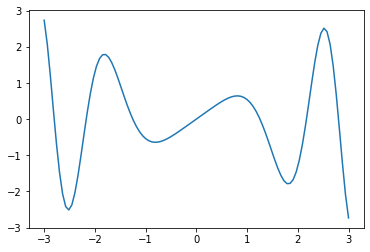

In [7]:
def f(x): return x*np.cos(x**2)
x = np.linspace(-3,3,100)
y = f(x)
plt.plot(x,y)

We can plot more than one function by simply calling `plt.plot` multiple times.  Here's the graph of $f$ together with is derivative.

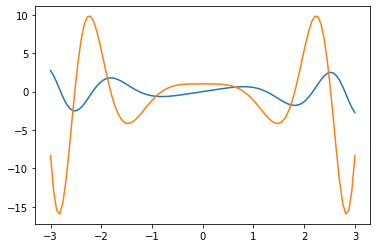

In [8]:
def fp(x): return np.cos(x**2) - 2*x**2 * np.sin(x**2)
yp = fp(x)
plt.plot(x,y)
plt.plot(x,yp)

# References

## Learning Resources
* [Official Python Documentation](http://docs.python.org/2.7), including
    - [Python Tutorial](http://docs.python.org/2.7/tutorial)
    - [Python Language Reference](http://docs.python.org/2.7/reference)
* If you're interested in Python 3, the [Official Python 3 Docs are here](http://docs.python.org/3/).
* [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).
* [Learn Python The Hard Way](http://learnpythonthehardway.org/book/)
* [Dive Into Python](http://www.diveintopython.net/), in particular if you're interested in Python 3.
* [Invent With Python](http://inventwithpython.com/), probably best for kids.
* [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html)
* [The Structure and Interpretation of Computer Programs](http://mitpress.mit.edu/sicp/full-text/book/book.html), written in Scheme, a Lisp dialect, but one of the best books on computer programming ever written.
* [Generator Tricks for Systems Programmers](http://www.dabeaz.com/generators/) Beazley's slides on just what generators can do for you.
* [Python Module of the Week](http://pymotw.com/2/contents.html) is a series going through in-depth analysis of the Python standard library in a very easy to understand way.

## Badass Jupyter notebooks for Python
* Rob Johansson's [excellent notebooks](http://jrjohansson.github.io/), including [Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) and [Computational Quantum Physics with QuTiP](https://github.com/jrjohansson/qutip-lectures) lectures;
* [XKCD style graphs in matplotlib](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb);
* [A collection of Notebooks for using IPython effectively](https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively)
* [A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
* [Cross-disciplinary computational analysis IPython Notebooks From Hadoop World 2012](https://github.com/invisibleroads/crosscompute-tutorials)
* [Quantites](http://nbviewer.ipython.org/urls/raw.github.com/tbekolay/pyconca2012/master/QuantitiesTutorial.ipynb) Units in Python.